# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [25]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '.\\examples\\tsd\\train.p'
validation_file='.\\examples\\tsd\\valid.p'
testing_file = '.\\examples\\tsd\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [26]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np
import math

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

classes = np.concatenate((y_train, y_test, y_valid))
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(classes))

unique, indices, freqs = np.unique(classes, return_index=True, return_counts=True)
indcnt = len(indices)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", X_valid.shape[0])
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

<BarContainer object of 43 artists>

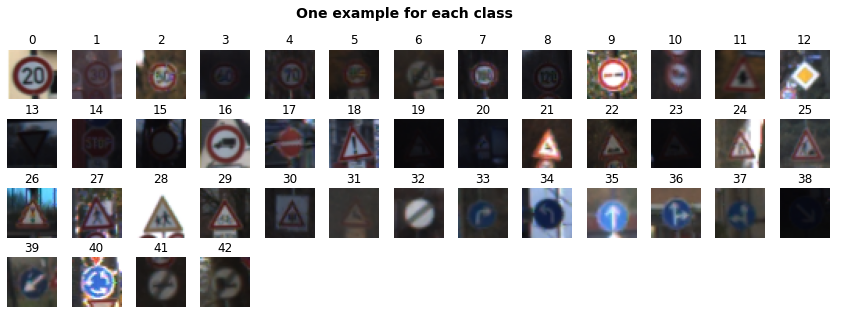

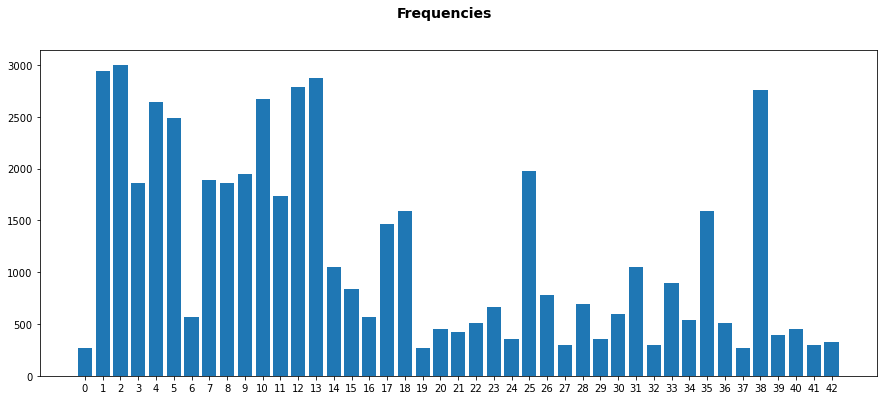

In [27]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Visualizations will be shown in the notebook.
%matplotlib inline

fig1 = plt.figure(1,figsize=(15, 6))
fig1.suptitle('One example for each class', fontsize=14, fontweight='bold')

num_cols = 13
num_rows = math.ceil(indcnt/num_cols)
cellscnt = num_rows * num_cols
gs = gridspec.GridSpec(num_rows+1, num_cols, hspace=0.4, wspace=0)
ax = [plt.subplot(gs[i]) for i in range(cellscnt)]
for i in range(cellscnt):
    if i< indcnt:
        ii = indices[i]
        im = X_train[ii]
        ax[i].set_title(y_train[ii])
        ax[i].imshow(im)
    ax[i].axis('off')
    
fig2 = plt.figure(2, figsize=(15, 6))
fig2.suptitle('Frequencies', fontsize=14, fontweight='bold')
plt.xticks(np.arange(min(unique), max(unique)+1, 1.0))
plt.bar(unique,freqs)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [32]:
def distort(img, maxAngle = np.pi/18, maxCenterDistance = 6, maxScale = 1.2):
    '''
    Adds distortion to input img
    img - numpy array (height, weight, chans)
    maxAngle - maximum absolute angle, will be used to select random from [-maxAngle,maxAngle] uniformely
    maxCenterDistance - maximum distance to move center of rotation
    maxScale - maximum scale
    '''
    dangle = np.random.uniform(-maxAngle, maxAngle, 1)[0]
    distance = math.sqrt(maxCenterDistance)
    dx = math.floor(np.random.uniform(-distance, distance, 1)[0])
    dy = math.floor(np.random.uniform(-distance, distance, 1)[0])
    dscale = np.random.uniform(2-maxScale, maxScale, 1)[0]
    dcenter = np.array(img.shape[0:2])/2 +[dx,dy]
    rot_mat = cv2.getRotationMatrix2D(tuple(dcenter), dangle, dscale)
    result = cv2.warpAffine(img, rot_mat, img.shape[:2], flags=cv2.INTER_LINEAR)
    return result

def generate_fakes (X_data, y_data, with_distort = True):
    '''
    Generates additional samples for labels with frequency less then mean.
    X_data - samples, np.array (batch,height,width,chans)
    y_data - labls, np.array (batch)
    with_distort - if true, generated samples will be distorted.
    '''
    unique, indices, freqs = np.unique(y_data, return_index=True, return_counts=True)
    print ("unique len = ", len(unique))
   
    freqmean = np.mean(freqs)
    freqstd = np.std(freqs)
    print ("freqmean = ", freqmean)
    
    data_shape = X_data.shape[1:]
    
    genlabels = y_data[indices[np.where (freqs < freqmean)]]
    X_fake = np.empty(np.concatenate(([0], data_shape)))
    y_fake = np.empty([0])

    for class_label in genlabels:
        class_samples = X_data[np.where(y_data == class_label)]
        freq = len(class_samples)
        repetitions = math.floor(freqmean/freq)
        add_samples = np.repeat(class_samples, repetitions, axis=0)
        add_labels = np.repeat([class_label], repetitions*freq, axis=0)
        X_fake = np.concatenate((X_fake, add_samples), axis=0)
        y_fake = np.concatenate((y_fake, add_labels), axis=0)
    if with_distort:
        X_fake = np.array([distort(img) for img in X_fake])
    print ("X_data shape = ", X_data.shape)
    print ("X_fake shape = ", X_fake.shape)
    res_shape =np.concatenate((X_fake.shape[0:3], data_shape[2:]), axis=0)
    X_res = np.concatenate((X_data, np.reshape(X_fake, res_shape)), axis=0)
    y_res = np.concatenate((y_data, y_fake), axis=0)
    return X_res, y_res      


In [33]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2

def grayscale(img):
    return np.reshape(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2GRAY), (32, 32, 1))

def local_normalize(img):
    height, width = img.shape[:2];
    res = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    return np.reshape(res, (32, 32, 1))

def global_normalize(img):
    return (img / (np.max(img)-np.min(img)))

def preprocess(imgs):
    return np.asarray([local_normalize(grayscale(img)) for img in imgs])

# grayscale + local normalization
X_trainCV = preprocess(X_train)
X_validCV = preprocess(X_valid)
X_testCV = preprocess(X_test)
# generate fake samples for labels with low frequency in train dataset
X_trainPrep, y_trainPrep = generate_fakes (X_trainCV, y_train)
X_trainPrep, y_trainPrep = shuffle(X_trainPrep, y_trainPrep)


X_validPrep = X_validCV
X_testPrep = X_testCV
channs =  X_trainPrep.shape[3]

print ("Prep completed: X_trainPrep.shape =", X_trainPrep.shape)


unique len =  43
freqmean =  809.2790697674419
X_data shape =  (34799, 32, 32, 1)
X_fake shape =  (16649, 32, 32)
Prep completed: X_trainPrep.shape = (51448, 32, 32, 1)


In [57]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

print("tf version:", tf.__version__)

# MNIST dataset parameters.
num_classes = 43 # total classes (0-9 digits).

# Training parameters.
learning_rate = 0.001
training_steps = 200
BATCH_SIZE = 128
display_step = 10

# Network parameters.
conv1_filters = 12 # number of filters for 1st conv layer.
conv2_filters = 32 # number of filters for 2nd conv layer.
fc3_units = 400 # number of neurons for 1st fully-connected layer.
fc35_units = 120 # number of neurons for 2st fully-connected layer.
fc4_units = 84 # number of neurons for 3st fully-connected layer.
fc4_units = 84 # number of neurons for 3st fully-connected layer.


# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((X_trainPrep, y_trainPrep))
train_data = train_data.repeat().shuffle(5000).batch(BATCH_SIZE).prefetch(1)

train_data

tf version: 2.1.0


<PrefetchDataset shapes: ((None, 32, 32, 1), (None,)), types: (tf.float64, tf.float64)>

### Model Architecture

In [74]:
# Create TF Model.
class LeNet(Model):
    # Set layers.
    def __init__(self):
        super(LeNet, self).__init__()
        # Convolution Layer with 32 filters and a kernel size of 5.
        self.lay1_conv = layers.Conv2D(conv1_filters, kernel_size=[5, 5], strides=[1, 1], padding='VALID',  activation=tf.nn.relu)        
        # Max Pooling (down-sampling) with kernel size of 2 and strides of 2. 
        self.lay1_pool = layers.MaxPool2D(pool_size=[2, 2], strides=[2, 2], padding='VALID')

        # Convolution Layer with 64 filters and a kernel size of 3.
        self.lay2_conv = layers.Conv2D(conv2_filters, kernel_size=5, strides=[1, 1], padding='VALID', activation=tf.nn.relu)
        # Max Pooling (down-sampling) with kernel size of 2 and strides of 2. 
        self.lay2_pool = layers.MaxPool2D(pool_size=[2, 2], strides=[2, 2], padding='VALID')

        # Flatten the data to a 1-D vector for the fully connected layer.
        self.lay2_flatten = layers.Flatten()

        # Fully connected layer.
        self.lay3_fc = layers.Dense(fc3_units)
        # Apply Dropout (if is_training is False, dropout is not applied).
        self.lay3_dropout = layers.Dropout(rate=0.5)
        # Apply ReLU activation.
        self.lay3_relu = layers.ReLU()

        # Fully connected layer.
        self.lay35_fc = layers.Dense(120, activation='relu')

        # Fully connected layer.
        self.lay4_fc = layers.Dense(84, activation='relu')

        # Output layer, class prediction.
        self.logits = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = tf.reshape(x, [-1, 32, 32, 1])
        x = self.lay1_conv(x)
        x = self.lay1_pool(x)
        x = self.lay2_conv(x)
        x = self.lay2_pool(x)
        x = self.lay2_flatten(x)
        x = self.lay3_fc(x)
        x = self.lay3_dropout(x)
        x = self.lay3_relu(x)
        x = self.lay35_fc(x)
        x = self.lay4_fc(x)
        x = self.logits(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build neural network model.
le_net = LeNet()


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [75]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.Adam(learning_rate)

In [76]:
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = le_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = le_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [79]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = le_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 10, loss: 2.898162, accuracy: 0.968750
step: 20, loss: 2.914121, accuracy: 0.953125
step: 30, loss: 2.901908, accuracy: 0.968750
step: 40, loss: 2.882342, accuracy: 0.953125
step: 50, loss: 2.896175, accuracy: 0.960938
step: 60, loss: 2.869894, accuracy: 0.992188
step: 70, loss: 2.876566, accuracy: 0.976562
step: 80, loss: 2.892993, accuracy: 0.960938
step: 90, loss: 2.860946, accuracy: 0.984375
step: 100, loss: 2.900476, accuracy: 0.929688
step: 110, loss: 2.881379, accuracy: 0.968750
step: 120, loss: 2.921285, accuracy: 0.929688
step: 130, loss: 2.895697, accuracy: 0.960938
step: 140, loss: 2.848966, accuracy: 1.000000
step: 150, loss: 2.855256, accuracy: 0.976562
step: 160, loss: 2.876420, accuracy: 0.968750
step: 170, loss: 2.865376, accuracy: 0.992188
step: 180, loss: 2.861720, accuracy: 0.992188
step: 190, loss: 2.864557, accuracy: 0.976562
step: 200, loss: 2.858013, accuracy: 0.984375


In [84]:
# Test model on validation set.
pred = le_net.predict(X_testPrep) # or just le_net(X_testPrep), but the latter wont set input_shape property for the model 
#wich wont allow to save whole model
print("Test Accuracy: %f" % accuracy(pred, y_test))

# we can just save learned parameters        
le_net.save_weights('trained-weights/model.ckpnt')
# or the whole model
le_net.save('trained-model') 


Test Accuracy: 0.875614
INFO:tensorflow:Assets written to: trained-model\assets


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

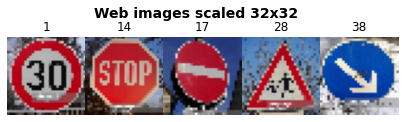

In [85]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from os.path import isfile, join, splitext
path = "./test-web/"
onlyfiles = [f for f in os.listdir(path) if isfile(join(path, f))]
web_data = [[cv2.cvtColor(cv2.imread(join(path, f)), cv2.COLOR_BGR2RGB),int(splitext(f)[0])] for f in onlyfiles]
X_web = np.asarray([cv2.resize(img, (32, 32)) for img,lbl in web_data])
y_web = np.asarray([lbl for img,lbl in web_data])
X_webPrep = preprocess(X_web)

fig5 = plt.figure(5,figsize=(7, 2))
fig5.suptitle('Web images scaled 32x32', fontsize=14, fontweight='bold')

gsWeb = gridspec.GridSpec(1, 5, hspace=0, wspace=0)
axWeb = [plt.subplot(gsWeb[i]) for i in range(5)]
for i in range(5):
    if i< indcnt:
        im = X_web[i]
        axWeb[i].set_title(y_web[i])
        axWeb[i].imshow(im)
    axWeb[i].axis('off')


### Predict the Sign Type for Each Image

In [88]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# we can load whole saved model but not with my build.. https://github.com/tensorflow/tensorflow/issues/35446
# le_net = tf.keras.models.load_model('trained-model')
# but even with my build 2.1.0 we can load weights
le_net.load_weights('trained/model.ckpnt')
y_pred = le_net(X_webPrep) 
print("Test Accuracy: %f" % accuracy(y_pred, y_web))
print("Predicted labels:", tf.argmax(y_pred, 1).numpy())
print("Predicted scores:", y_pred.numpy())

Test Accuracy: 0.800000
Predicted labels: [ 1 14 34 28 38]
Predicted scores: [[5.17739914e-02 9.48154926e-01 1.77895290e-05 1.01337753e-06
  2.52944119e-07 5.99005361e-08 3.97284020e-05 2.71662408e-08
  4.82656271e-09 2.53659212e-14 4.91264408e-12 1.38015173e-08
  9.89785167e-06 7.03628605e-12 2.70052105e-08 4.57363227e-12
  2.66207022e-14 9.58903998e-11 7.22715843e-09 1.34662620e-11
  7.19523746e-12 1.75868909e-14 9.37945523e-16 1.01868340e-12
  1.84073392e-13 6.41781206e-09 2.41615725e-14 1.84462737e-10
  1.02768844e-11 4.54572019e-10 9.64621352e-12 2.72495027e-10
  1.31450184e-10 1.50302291e-16 1.02373365e-09 6.15747731e-12
  1.43726109e-13 1.78608636e-12 3.73181352e-09 4.87899194e-15
  2.38408597e-06 1.61006516e-12 1.10308891e-08]
 [1.21231924e-03 1.65713383e-04 3.19623854e-04 2.12777049e-05
  1.29252818e-04 8.22446282e-07 5.80316195e-09 1.30033399e-07
  3.97406097e-07 6.06091908e-06 7.05051264e-07 3.29294920e-08
  9.12618343e-05 4.26957995e-05 9.94889855e-01 3.57338227e-04
  2.916

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [95]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

le_net.load_weights('trained/model.ckpnt')
y_pred = le_net(X_webPrep) 
print("Predicted labels:", tf.math.top_k(y_pred, 5).values.numpy())


#with tf.Session() as sess:
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
#    softmax = tf.nn.top_k(tf.nn.softmax(logits),k=5)
#    out = sess.run(softmax, feed_dict={x: X_webPrep, y: y_web, keep_prob: prob_valid})
#    print("result = ", out)

Predicted labels: [[9.4815493e-01 5.1773991e-02 3.9728402e-05 1.7789529e-05 9.8978517e-06]
 [9.9488986e-01 2.4808224e-03 1.2123192e-03 3.5733823e-04 3.1962385e-04]
 [9.2915177e-01 4.1202992e-02 1.6177703e-02 9.4253570e-03 1.7383100e-03]
 [9.8761684e-01 8.0395043e-03 2.4723182e-03 1.4741255e-03 2.5721552e-04]
 [1.0000000e+00 7.2623105e-12 1.3419634e-12 8.9305367e-14 3.1975121e-14]]


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
TODO